In [684]:
import pandas as pd

# 데이터 준비
bc_df = pd.read_csv('breast_cancer.csv', index_col=0)
bc_df.head(), bc_df.shape

(   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
 0        17.99         10.38          122.80     1001.0          0.11840   
 1        20.57         17.77          132.90     1326.0          0.08474   
 2        19.69         21.25          130.00     1203.0          0.10960   
 3        11.42         20.38           77.58      386.1          0.14250   
 4        20.29         14.34          135.10     1297.0          0.10030   
 
    mean compactness  mean concavity  mean concave points  mean symmetry  \
 0           0.27760          0.3001              0.14710         0.2419   
 1           0.07864          0.0869              0.07017         0.1812   
 2           0.15990          0.1974              0.12790         0.2069   
 3           0.28390          0.2414              0.10520         0.2597   
 4           0.13280          0.1980              0.10430         0.1809   
 
    mean fractal dimension  ...  worst texture  worst perimeter  worst area  \

In [685]:
bc_df.columns.unique()

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [686]:
from sklearn.preprocessing import LabelEncoder

# object → int 
le_disaster = LabelEncoder()
bc_df['target'] = le_disaster.fit_transform(bc_df['target'])
bc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         569 no

In [687]:
bc_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.372583
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,0.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [688]:
# 결측치 처리
# bc_df.isnull().sum()
# bc_df = bc_df.dropna()

In [689]:
# 중복 데이터 확인 및 제거
# bc_df.duplicated().sum()
# bc_df.drop_duplicates(inplace=True)

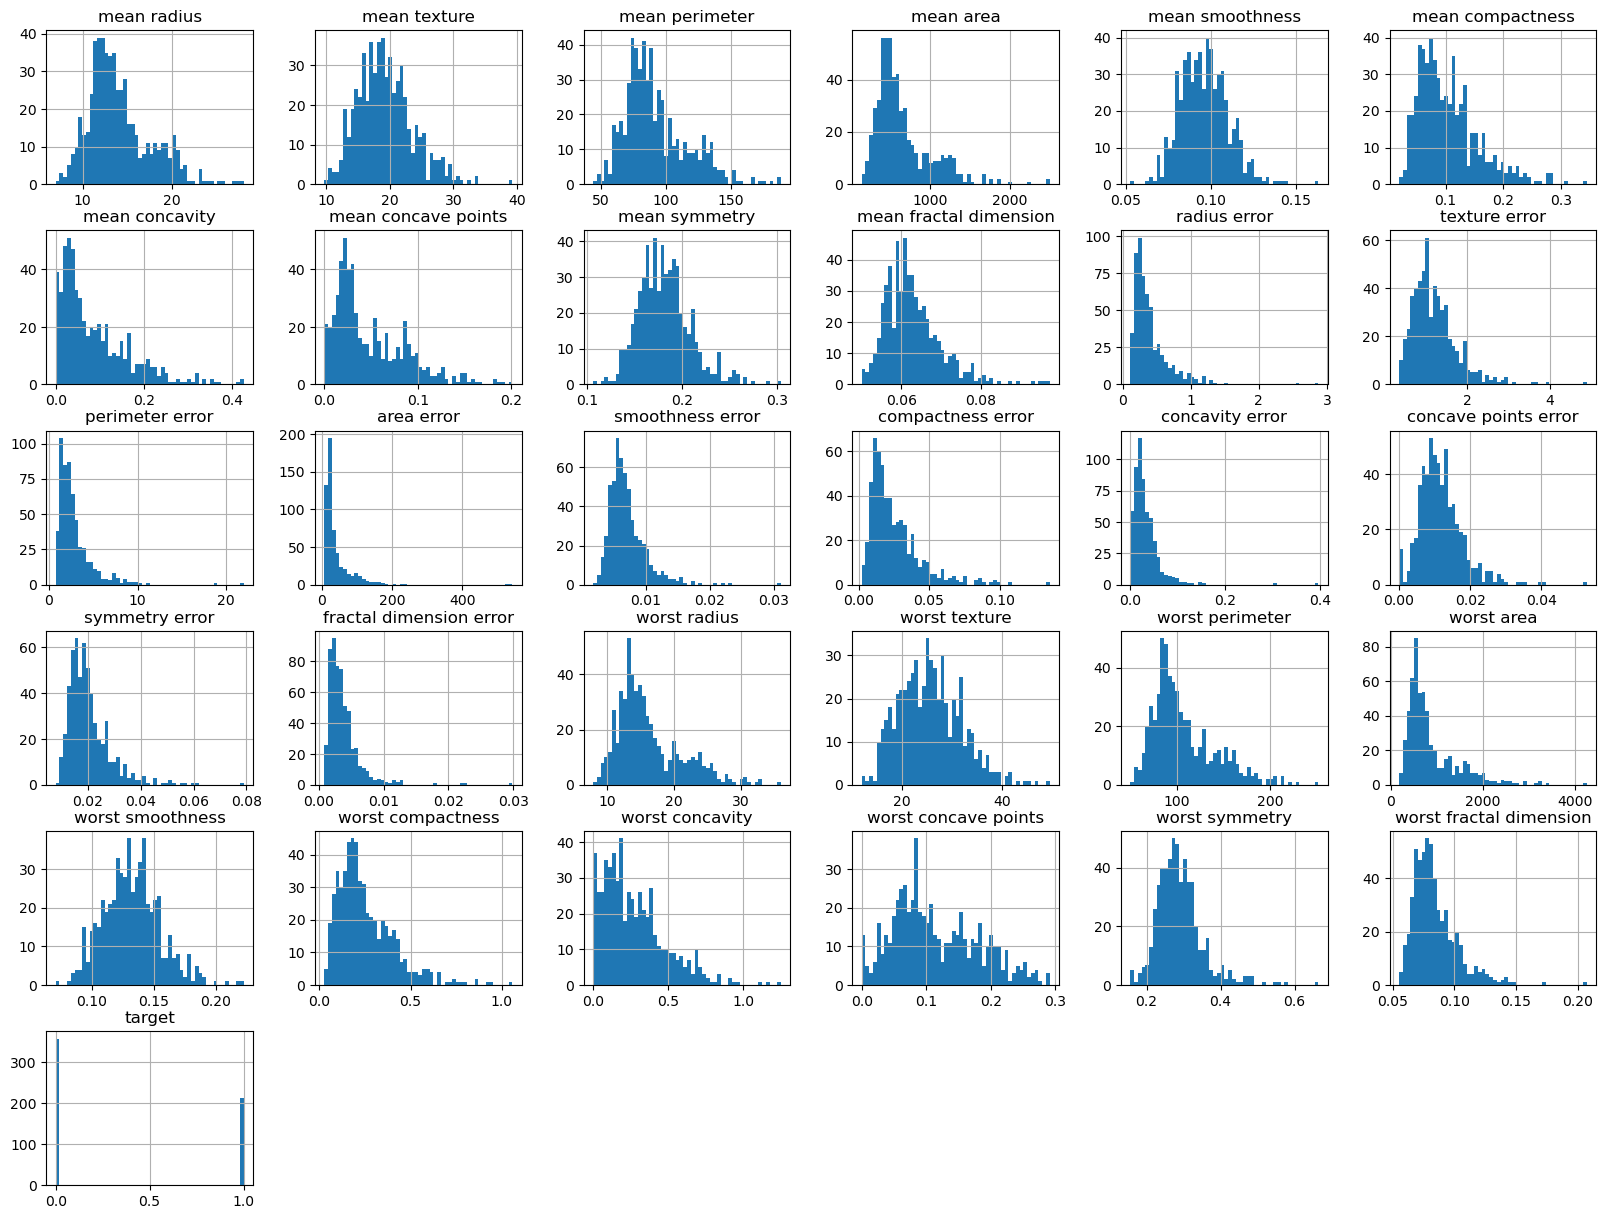

In [690]:
import seaborn as sns
import matplotlib.pyplot as plt
bc_df.hist(bins=50, figsize=(20,15))
plt.show()

<Axes: >

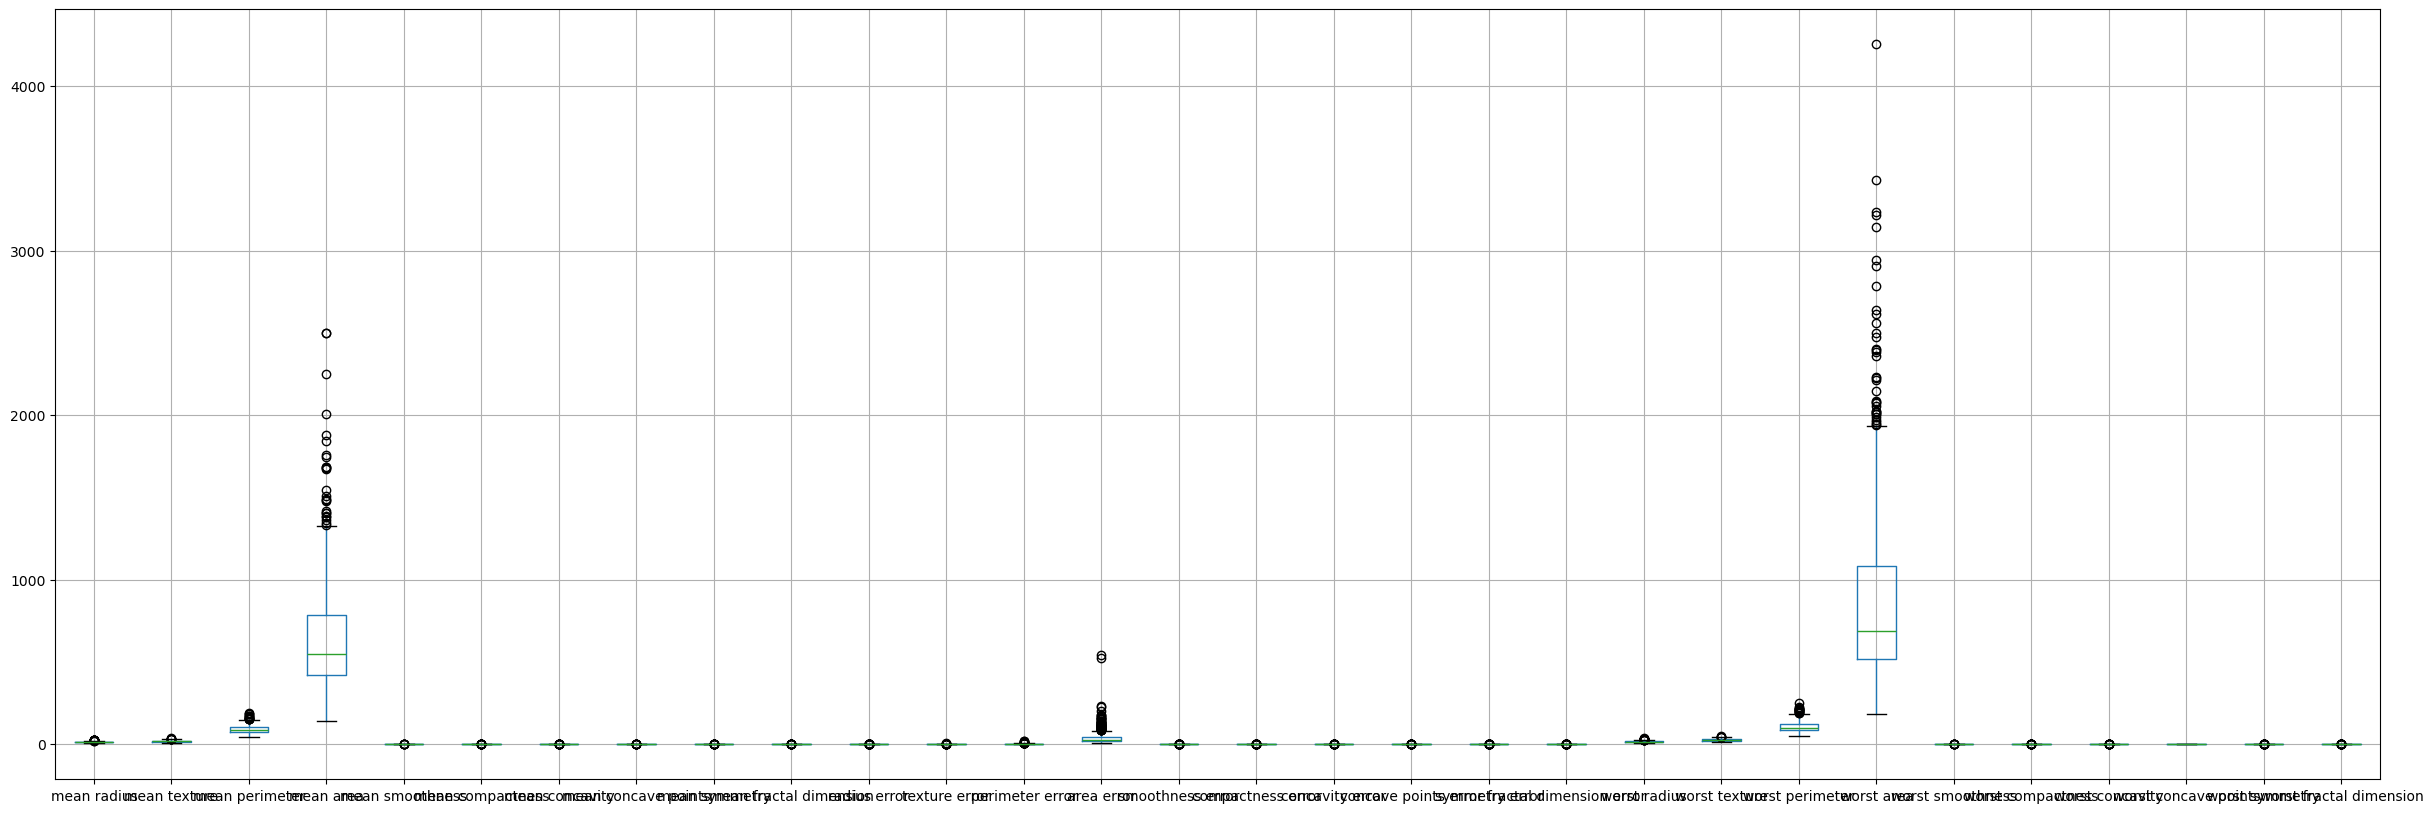

In [691]:
# 이상치 확인
bc_df.drop('target', axis=1).boxplot(figsize=(30,10))

In [692]:
# 이상치 제거
bc_df = bc_df[bc_df['symmetry error'] <= 4000]

In [693]:
from sklearn.model_selection import train_test_split

X = bc_df.drop(columns=['target'])
y = bc_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [694]:
# 데이터 스케일링
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [695]:
# 모델 훈련
# from sklearn.linear_model import LogisticRegression
# model = LogisticRegression(max_iter=200)

# from sklearn.tree import DecisionTreeClassifier
# model = DecisionTreeClassifier(criterion='entropy',
#                                max_depth=4,
#                                random_state=42)


# model.fit(X_train_scaled, y_train)

# pred = model.predict(X_test_scaled)

# # depth 깊이 확인
# depth = model.get_depth()
# print(f"Tree depth: {depth}")

In [696]:
# 앙상블
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier

model1 = DecisionTreeClassifier(max_depth=4, random_state=42)
model2 = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=42)
model3 = AdaBoostClassifier(n_estimators=50, algorithm='SAMME', random_state=42)

ensemble_model = VotingClassifier(estimators=[
    ('dt', model1),
    ('rf', model2),
    ('ab', model3)],
    voting='soft') # 'hard'

ensemble_model.fit(X_train_scaled, y_train)

pred = ensemble_model.predict(X_test_scaled)

In [697]:
from sklearn.metrics import accuracy_score

model1.fit(X_train_scaled, y_train)
model2.fit(X_train_scaled, y_train)
model3.fit(X_train_scaled, y_train)

pred1 = model1.predict(X_test_scaled)
pred2 = model2.predict(X_test_scaled)
pred3 = model3.predict(X_test_scaled)

# 각 모델의 정확도
acc1 = accuracy_score(y_test, pred1)
acc2 = accuracy_score(y_test, pred2)
acc3 = accuracy_score(y_test, pred3)

print(f"Decision Tree Accuracy: {acc1:.2f}")
print(f"Random Forest Accuracy: {acc2:.2f}")
print(f"AdaBoost Accuracy: {acc3:.2f}")

Decision Tree Accuracy: 0.95
Random Forest Accuracy: 0.97
AdaBoost Accuracy: 0.97


In [698]:
# 성능
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
# accuracy = accuracy_score(y_test, pred)
# precision = precision_score(y_test, pred)
# recall = recall_score(y_test, pred)
# f1 = f1_score(y_test, pred)
roc_auc = roc_auc_score(y_test, pred)

# print(f"정확도: {accuracy:.2f}")
# print(f"정밀도: {precision:.2f}")
# print(f"재현율: {recall:.2f}")
# print(f"F1 점수: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}\n")

cm = confusion_matrix(y_test, pred)
print("혼동 행렬:\n", cm, '\n')

report = classification_report(y_test, pred)
print("classification report:\n", report)

ROC AUC: 0.96

혼동 행렬:
 [[105   3]
 [  3  60]] 

classification report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       108
           1       0.95      0.95      0.95        63

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

